In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Contrastive Losss v2'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'contrastive_learning_rate'], y_min=30)

In [3]:
# viz.plot_single_setting_aggregated('stat-wmm;128;True;0.003;5;nan', fontsize=25, filename="example_run_stat-wmm_rehearsal", layout='vertical')


# viz.plot_single_setting_aggregated(';128;False;0.003;5;nan', fontsize=25, filename="example_run_no_rehearsal", layout='vertical')

In [4]:
viz.extract_all_runs_metrics_after_task_3()

In [5]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[1]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90)
    plt.title(f"metic: {metric_name}       label convention: dataset pretraining? epochs")
    plt.xlabel("unique identifier")
    plt.ylabel("accuracy [%]")
    plt.show()

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

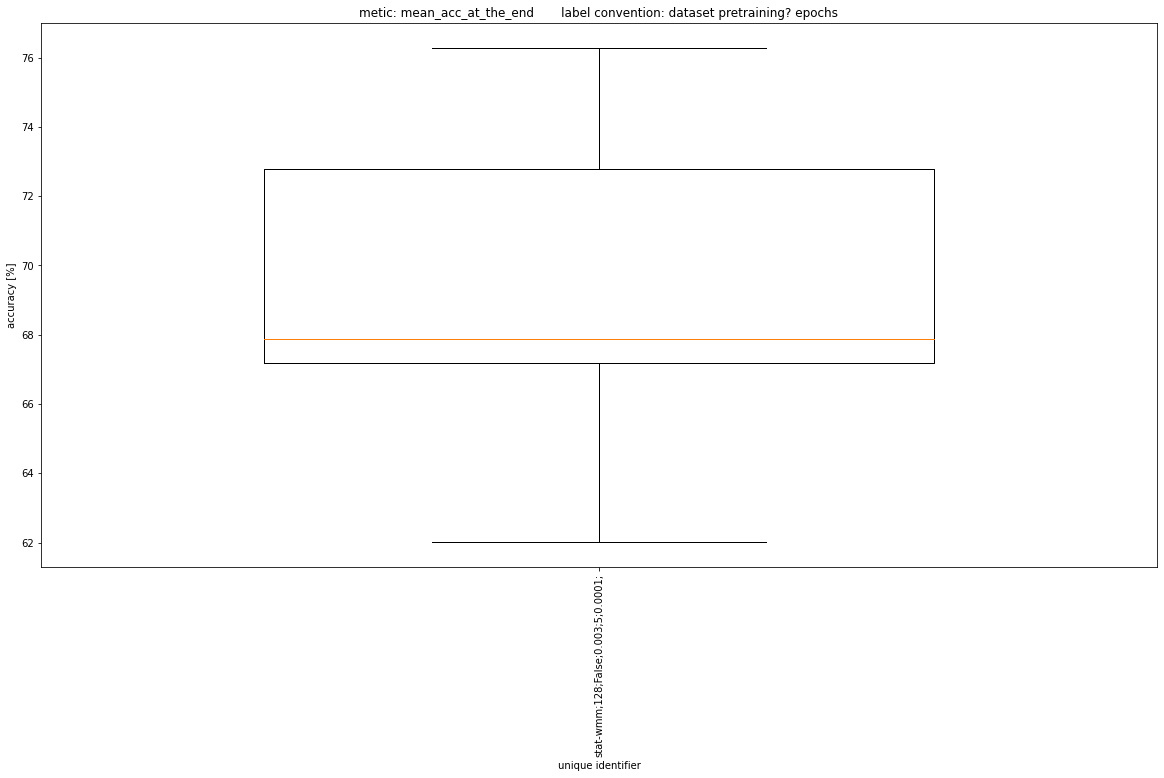

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,contrastive_learning_rate,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;False;0.003;5;0.0001;,69.449997,68.415833,0.550001,71.650002,47.599998,71.849998,67.296354,0.616666,73.699997,...,128,False,0.003,5,0.0001,67.883331,69.449997,28.909726,1.003334,61.530000
1,stat-wmm;128;False;0.003;5;0.0001;,65.949997,65.315000,0.625000,68.449997,43.349998,55.250000,54.531250,0.600000,57.049999,...,128,False,0.003,5,0.0001,62.016665,64.849998,29.466031,0.255000,64.349998
2,stat-wmm;128;False;0.003;5;0.0001;,73.900002,74.125000,1.574999,80.199997,51.750000,76.800003,75.051172,1.016665,79.849998,...,128,False,0.003,5,0.0001,72.783335,73.900002,33.232435,0.943333,72.409999
3,stat-wmm;128;False;0.003;5;0.0001;,66.199997,67.649375,1.612501,72.650002,49.849998,53.299999,53.805859,1.650000,58.250000,...,128,False,0.003,5,0.0001,67.183333,66.199997,31.777763,0.737500,69.620000
4,stat-wmm;128;False;0.003;5;0.0001;,72.550003,72.467812,0.824999,75.849998,51.500000,76.050003,73.306641,1.216665,79.699997,...,128,False,0.003,5,0.0001,76.283335,76.050003,33.319346,0.858333,72.110000


In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['rehearsal_dataset']=='stat-wmm') & (df['pretraining']=='True') & (df['separate_noise_output'].isin(['None']))]
# df = df[(df['batch_size_rehearsal'] != '128')]

box_plot('mean_acc_at_the_end', df)

df

In [9]:
viz.df.value_counts('UID')

UID
stat-wmm;128;False;0.003;5;0.0001;    5
dtype: int64

c:\Users\QbaSo\PycharmProjects\mgr\myCode\Results visualization\visualization.py:405: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(metrics_df.to_latex(index=False))


\begin{tabular}{rrrrl}
\toprule
 task &  acc at the end &  mean acc &  acc loss per task & split \\
\midrule
    0 &           68.50 &     69.26 &               1.22 &  test \\
    1 &           65.33 &     65.89 &               1.38 &  test \\
    2 &           69.17 &     69.39 &               1.47 &  test \\
    3 &           76.58 &     75.05 &               2.00 &  test \\
    4 &           73.94 &     69.63 &               0.00 &  test \\
\bottomrule
\end{tabular}



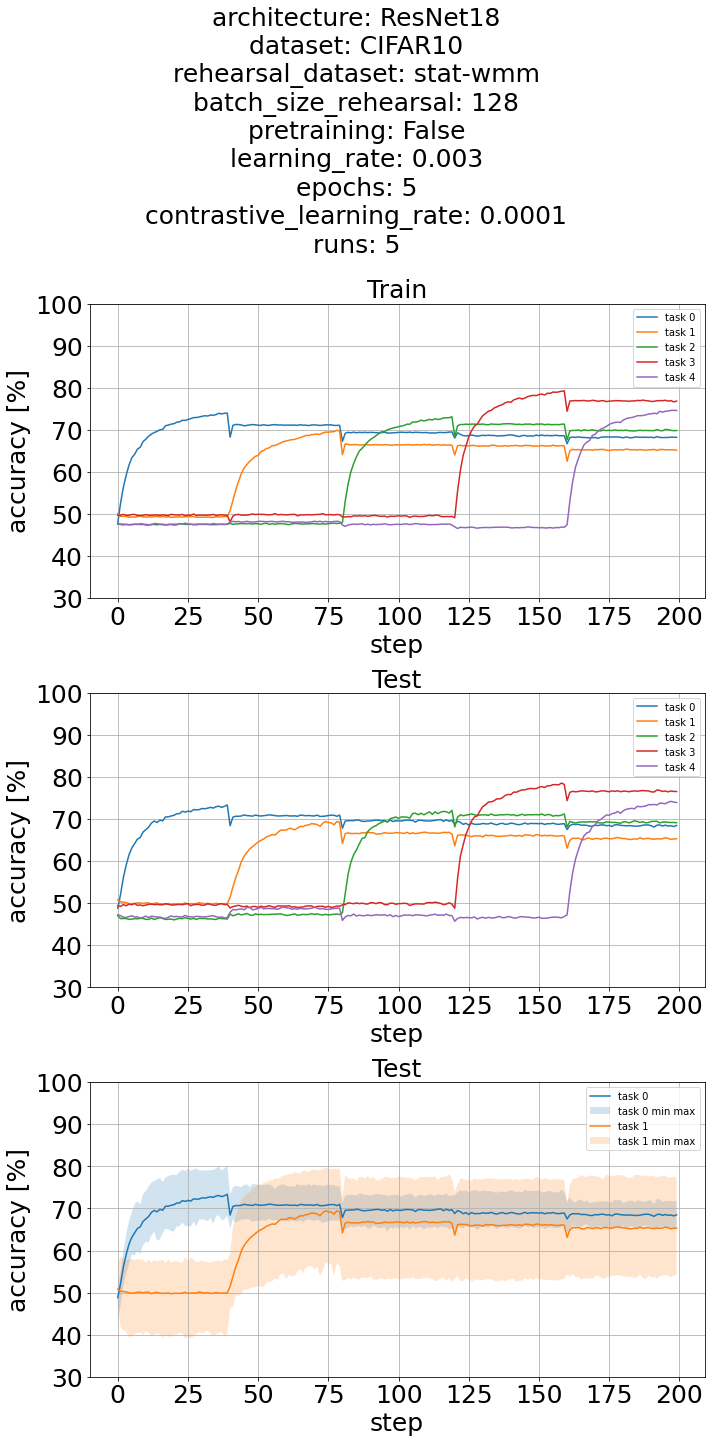

In [10]:
viz.plot_single_setting_aggregated('stat-wmm;128;False;0.003;5;0.0001', fontsize=25, filename=None, layout='vertical')

# All runs

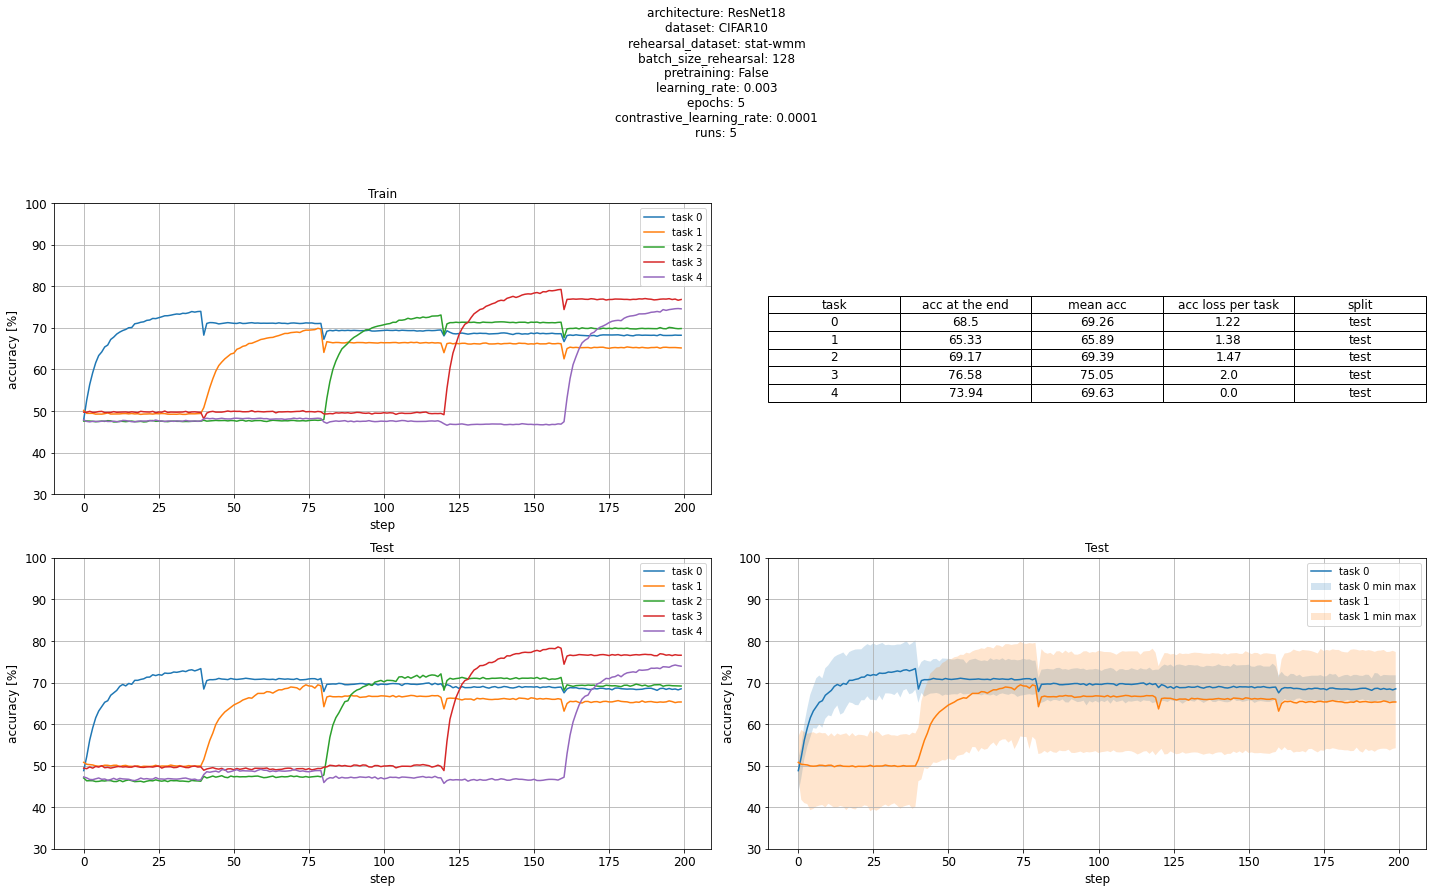

In [7]:
viz.plot_everything()